# <p style="background-color:#facfc8; font-family:calibri; color:Black; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Predicting Movie Success</p>

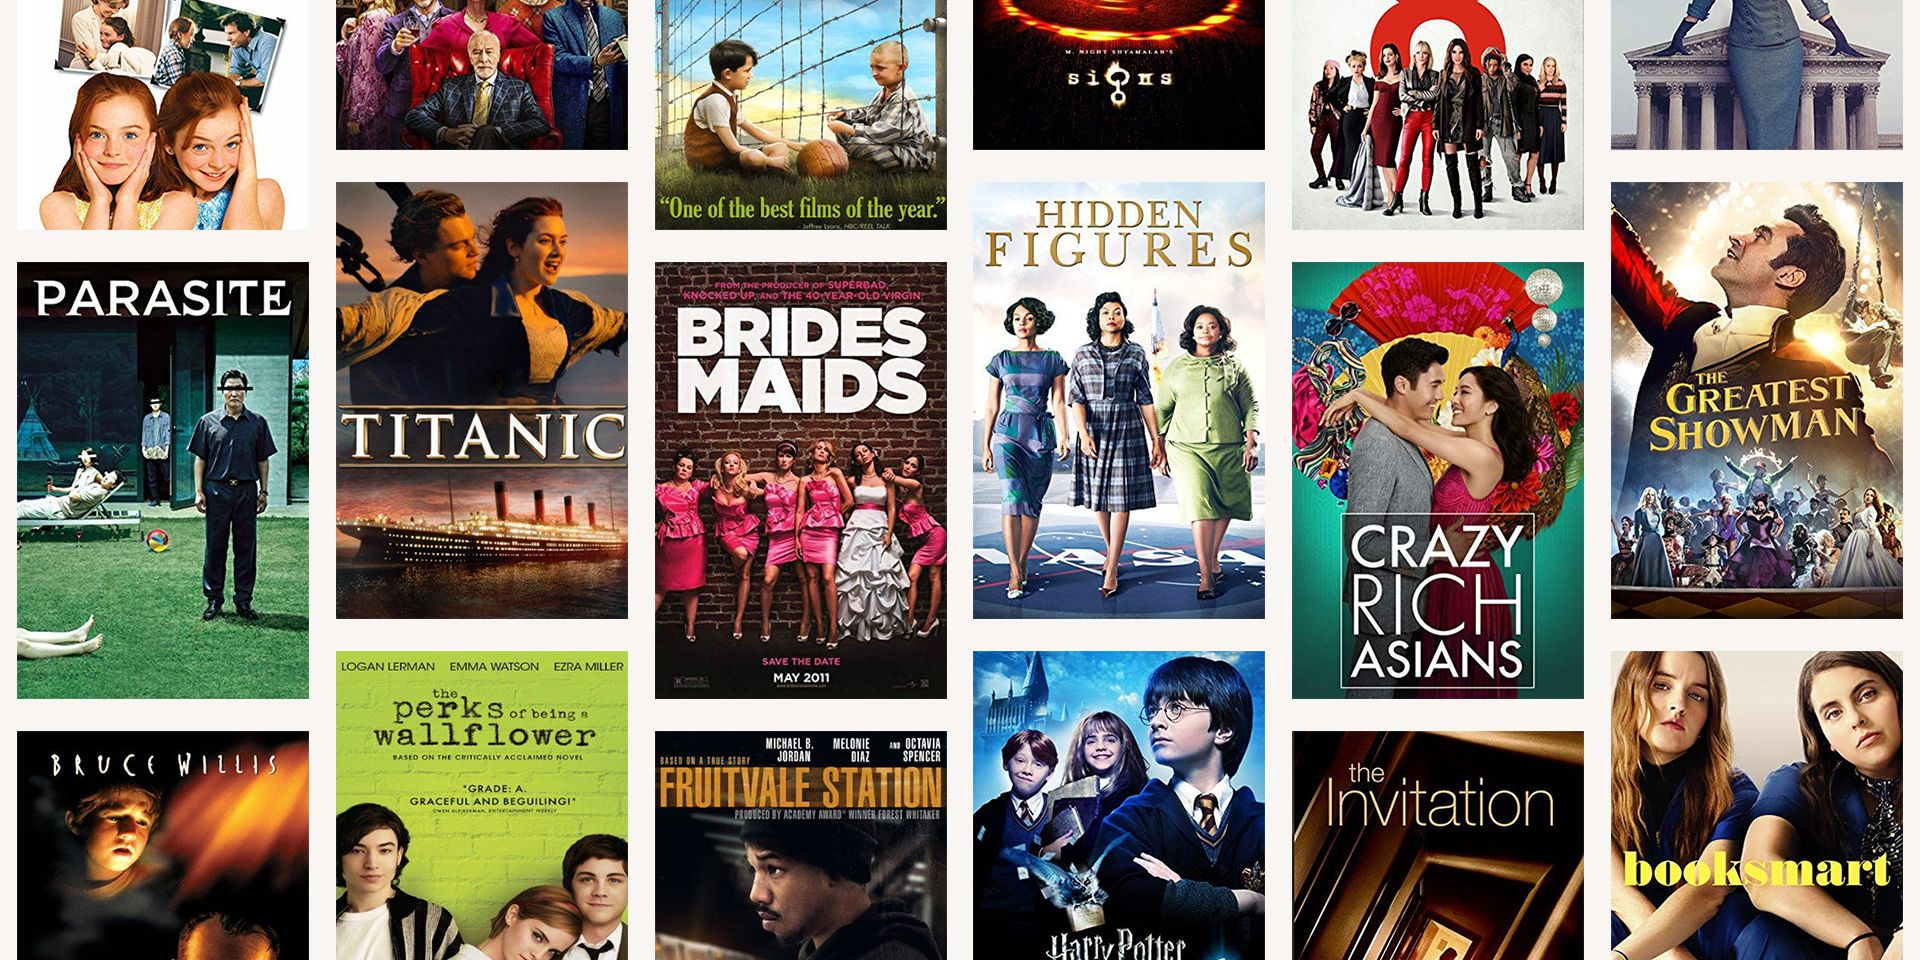6-2799-4902-abcc-611d8ec67ec6.webp)

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Problem:</font></h3>

In this project, we analyze a dataset of over 5,000 movies containing features such as budget, gross earnings, cast and director Facebook likes, genre, content rating, and more. The goal is to build a classification model that predicts whether a movie will be a **Hit**, **Average**, or **Flop** based on its IMDb score. Because production resources are limited and marketing budgets are precious, the business priority is to **maximize correct identification of potential hits**, making **precision** on the “Hit” class a key evaluation metric.
</div>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

### <span style="color:Blacl">Objectives:</span>

- **Explore the Dataset**: Uncover patterns, distributions, and relationships within the movie metadata.
- **Conduct Extensive Exploratory Data Analysis (EDA)**: Analyze relationships between features such as budget, gross, cast likes, and IMDb score.
- **Preprocessing Steps**:
  - Remove irrelevant features
  - Address missing values
  - Encode categorical variables
  - Transform skewed features (e.g., log budget/gross)

- **Model Building**:
  - Implement classification models like Logistic Regression, Random Forest, and Gradient Boosting
  - Emphasize high **precision** for predicting "Hit" movies, ensuring top-performing titles are reliably identified

- **Evaluate and Compare Model Performance**: Use metrics like accuracy, precision, recall, and F1-score to assess model performance across all classes.

</div>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

##  Step 1 | Import Libraries


In [266]:
# %% [code]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


> 💡 **Inference:**  
All essential libraries for data analysis, visualization, preprocessing are successfully imported. This sets up the working environment.


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

## Step 2 | Load Data


In [269]:
# Load dataset
df = pd.read_csv('movie_metadata.csv')


In [270]:
# View Top 5 Rows
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [271]:
# Basic overview
print("Shape of data:", df.shape)

Shape of data: (5043, 28)


> 💡 **Inference:**  
The dataset contains 5043 rows records and various features like budget, Facebook likes, IMDb scores, and genre. This is a rich dataset for classification.



<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

## Step 3 | Data Overview

<div style="border-radius:10px; padding: 15px; background-color: #d1e7dd; font-size:115%; text-align:left">
  
### Step 3.1 | Basic Info
</div>



In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

> 💡 **Inference:**  
Several columns have missing values (notably budget, gross, and some categorical fields). These must be handled to ensure clean modeling.


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

## Inference: Dataset has 5043 rows and missing values mainly in budget, gross, and some categorical columns.

<div style="border-radius:10px; padding: 15px; background-color: #d1e7dd; font-size:115%; text-align:left">
  
### Step 3.2 | Summary Statistics - Numerical
</div>


In [279]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [280]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [281]:
# 2. Target Variable Transformation

def classify_success(score):
    if score < 3:
        return 'Flop'
    elif score < 6:
        return 'Average'
    else:
        return 'Hit'

In [282]:
# Create new target column
df['success_class'] = df['imdb_score'].apply(classify_success)
print(df['success_class'].value_counts())


success_class
Hit        3589
Average    1413
Flop         41
Name: count, dtype: int64


> 💡 **Inference:**  
Most movies fall under the *Average* and *Hit* categories, with relatively fewer *Flops*. This indicates class imbalance, which may influence model performance—especially for the Flop class.


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

## Step 4 | EDA (Exploratory Data Analysis)


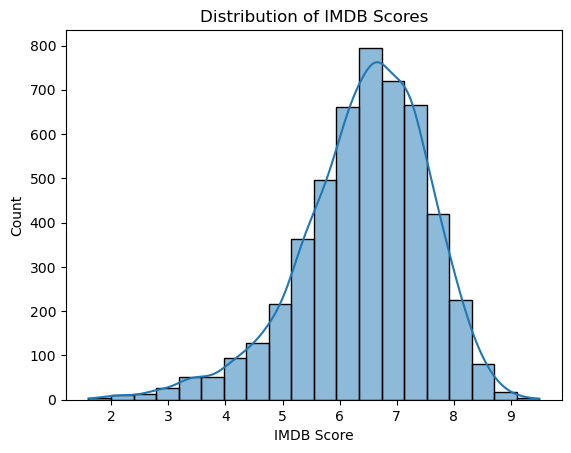

In [285]:
# Distribution of IMDB scores
sns.histplot(df['imdb_score'], bins=20, kde=True)
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Count')
plt.show()

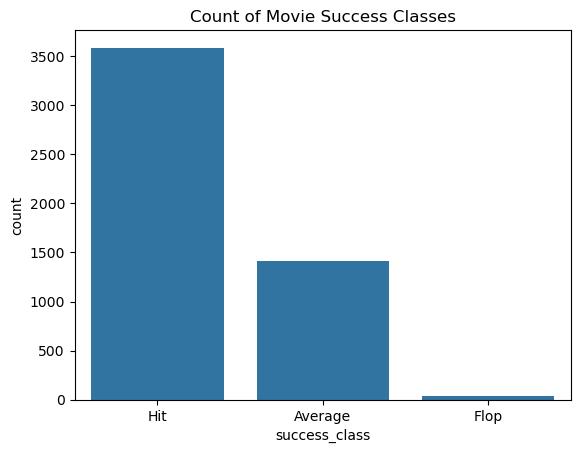

In [286]:
# Count of classes
sns.countplot(x='success_class', data=df)
plt.title('Count of Movie Success Classes')
plt.show()

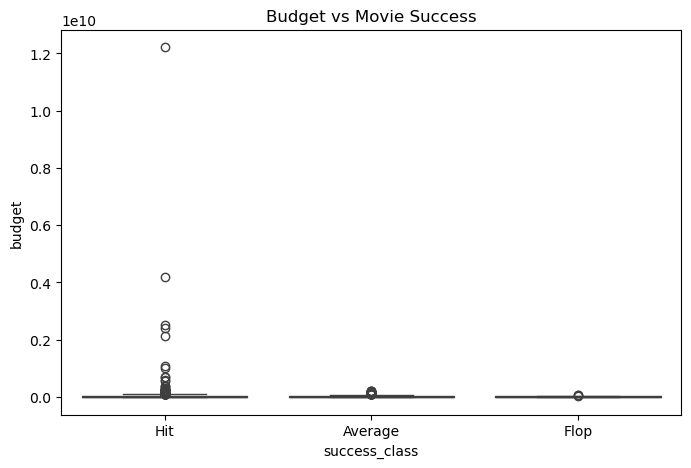

In [287]:
# Boxplot: Budget vs Success Class
plt.figure(figsize=(8,5))
sns.boxplot(x='success_class', y='budget', data=df)
plt.title('Budget vs Movie Success')
plt.show()

> 💡 **Inference:**  
Higher budget films are generally more likely to be *Hits*, while *Flops* tend to cluster around lower budgets. This shows that budget is a strong indicator of success.


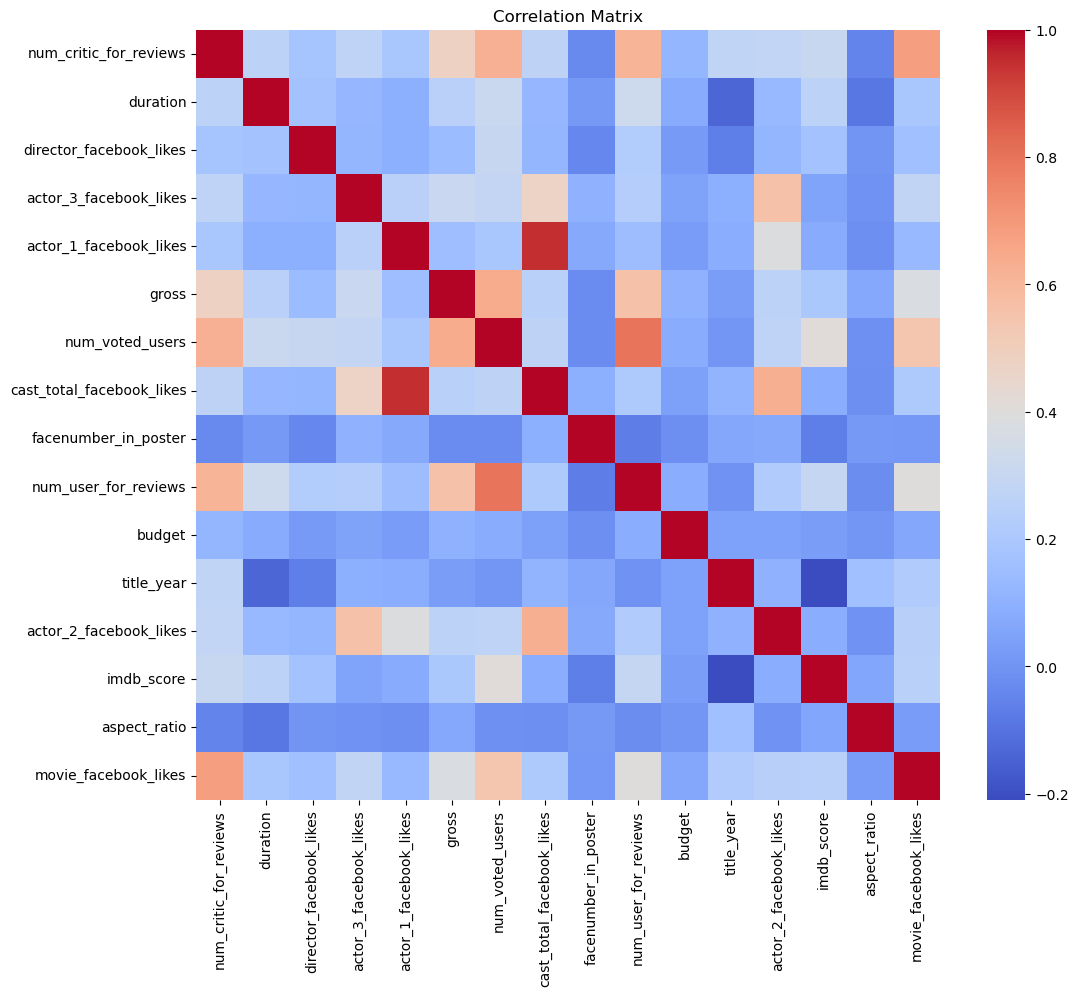

In [289]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

> 💡 **Inference:**  
Features such as *num_user_for_reviews*, *num_voted_users* show positive correlation with IMDb score and possibly success class. These may be important predictors.


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

## Step 5 | Data Preprocessing

In [292]:
# 4. Data Preprocessing

df_clean = df.copy()

<div style="border-radius:10px; padding: 15px; background-color:#d1e7dd ; font-size:115%; text-align:left">
  
### Step 5.1 | Remove Irrelevant Features
</div>


In [294]:
# Drop columns not needed for modeling
drop_cols = [
    'movie_title', 'movie_imdb_link', 'director_name',
    'actor_1_name', 'actor_2_name', 'actor_3_name', 'plot_keywords']
df_clean.drop(columns=drop_cols, inplace=True)


> 💡 **Inference:**  
('movie_title', 'movie_imdb_link', 'director_name',
    'actor_1_name', 'actor_2_name', 'actor_3_name', 'plot_keywords')are removed as they don’t add predictive power and can introduce noise.


In [296]:
# Handle missing values: numeric columns fill with median, categorical drop
num_cols = ['budget', 'gross']
for col in num_cols:
    df_clean.fillna({col: df_clean[col].median()}, inplace=True)

In [297]:
# Drop rows still containing any NaNs
df_clean.dropna(inplace=True)


> 💡 **Inference:**  
Numeric columns are filled using the median, and categorical columns are Droped. This avoids loss of data and keeps distributions intact.


In [299]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
cat_cols = ['color', 'genres', 'language', 'country', 'content_rating']
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    le_dict[col] = le  # save encoder if needed later


In [300]:
# Log transform skewed money columns
df_clean['log_budget'] = np.log1p(df_clean['budget'])
df_clean['log_gross'] = np.log1p(df_clean['gross'])

> 💡 **Inference:**  
Features like *budget* and *gross* are highly skewed right. Log transformation is appropriate to normalize them for better model performance.



In [302]:
# Count number of genres
df_clean['num_genres'] = df['genres'].apply(lambda x: len(str(x).split('|')))


In [303]:
# Prepare final feature set
numeric_features = [
    'duration', 'director_facebook_likes', 'actor_1_facebook_likes',
    'actor_2_facebook_likes', 'actor_3_facebook_likes', 'num_user_for_reviews',
    'num_critic_for_reviews', 'num_voted_users', 'cast_total_facebook_likes',
    'movie_facebook_likes', 'facenumber_in_poster', 'aspect_ratio',
    'log_budget', 'log_gross', 'num_genres'
]
categorical_features = ['color', 'genres', 'language', 'country', 'content_rating']
features = numeric_features + categorical_features

X = df_clean[features]
y = df_clean['success_class']


In [304]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [305]:
# Scale numeric features from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [306]:
# 6. Model Building and Evaluation Separately
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

## Step 6 | Random Forest Model Building 

Random Forest Classification Report:
              precision    recall  f1-score   support

     Average       0.70      0.47      0.56       244
        Flop       0.00      0.00      0.00         7
         Hit       0.82      0.93      0.87       639

    accuracy                           0.79       890
   macro avg       0.50      0.46      0.48       890
weighted avg       0.78      0.79      0.78       890



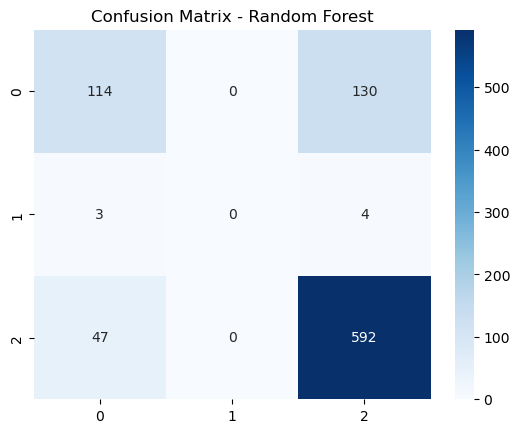

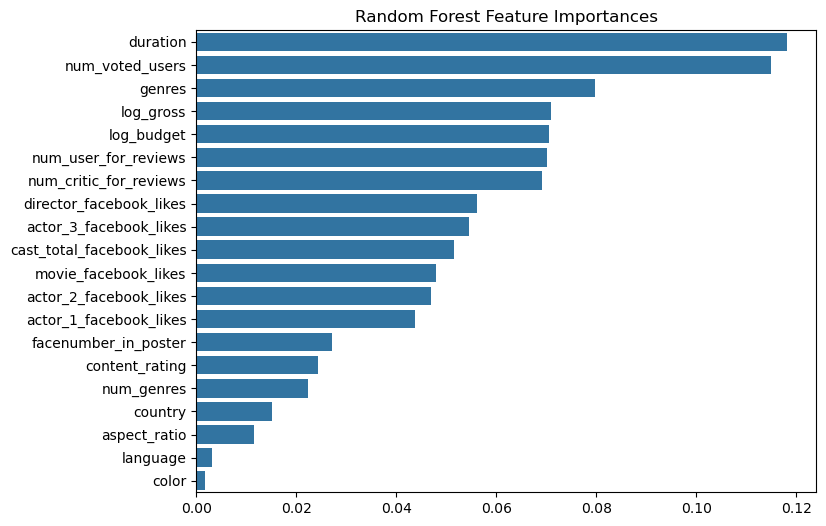

In [308]:
# --- Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
plt.figure(figsize=(8,6))
sns.barplot(x=importances_rf[indices_rf], y=[features[i] for i in indices_rf])
plt.title('Random Forest Feature Importances')
plt.show()



<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

## Step 7 | Logistic Regression Model Building 

Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Average       0.64      0.40      0.49       244
        Flop       0.00      0.00      0.00         7
         Hit       0.80      0.92      0.85       639

    accuracy                           0.77       890
   macro avg       0.48      0.44      0.45       890
weighted avg       0.75      0.77      0.75       890



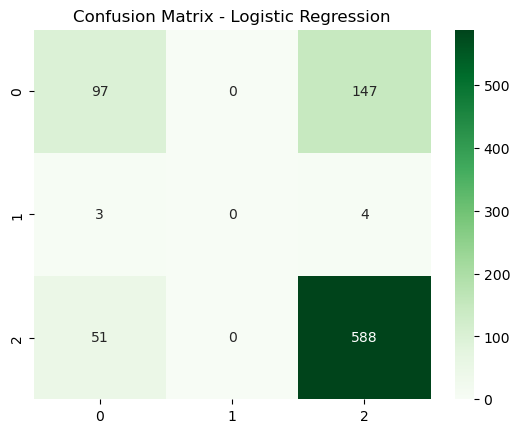

In [310]:
# --- Logistic Regression ---
lr = LogisticRegression(
    max_iter=10000,  # Further increased to ensure convergence
    solver='saga',   # Use saga for large multiclass problems
    random_state=42,
    n_jobs=-1
)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=0))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

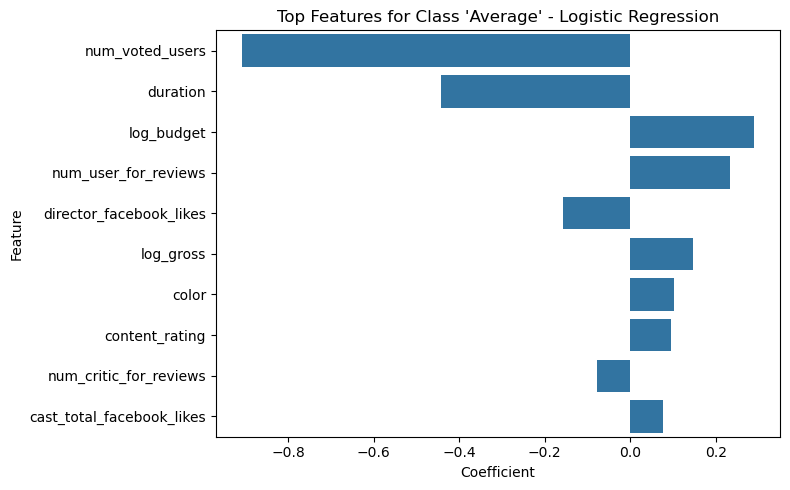

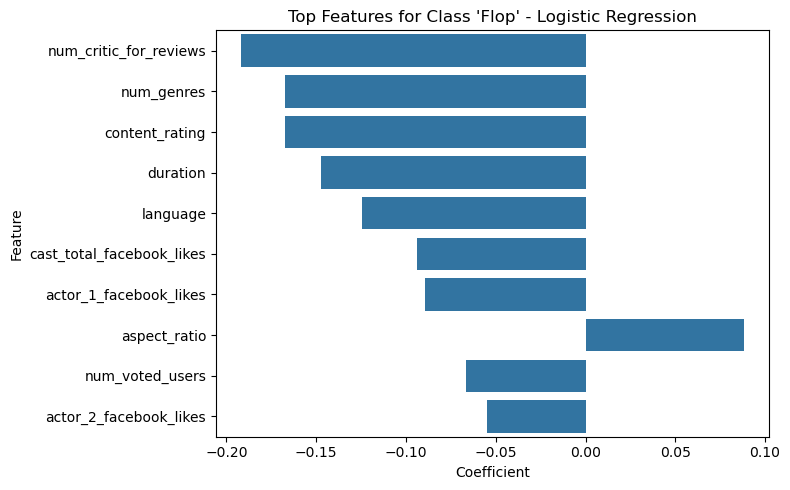

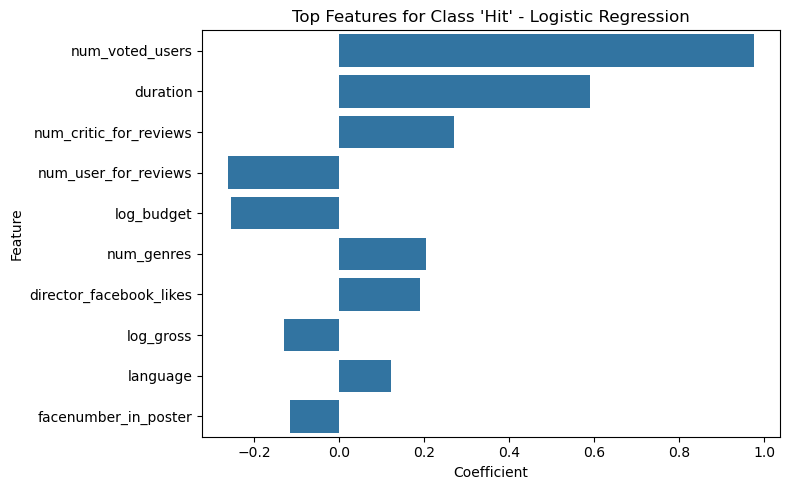

In [311]:
# Feature Importance for Logistic Regression
coefficients = lr.coef_
classes = lr.classes_
for i, class_label in enumerate(classes):
    coef = coefficients[i]
    sorted_idx = np.argsort(np.abs(coef))[::-1]
    top_features = [features[j] for j in sorted_idx[:10]]
    top_importance = coef[sorted_idx[:10]]
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_importance, y=top_features)
    plt.title(f"Top Features for Class '{class_label}' - Logistic Regression")
    plt.xlabel("Coefficient")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

## Step 8 | Gradient Boosting Model Building 

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

     Average       0.66      0.48      0.55       244
        Flop       0.00      0.00      0.00         7
         Hit       0.81      0.91      0.86       639

    accuracy                           0.78       890
   macro avg       0.49      0.46      0.47       890
weighted avg       0.77      0.78      0.77       890



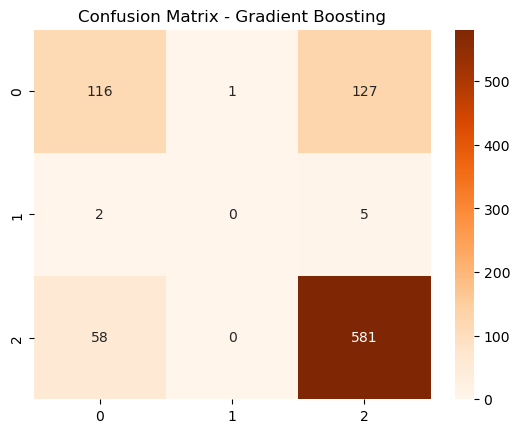

In [313]:
# --- Gradient Boosting ---
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

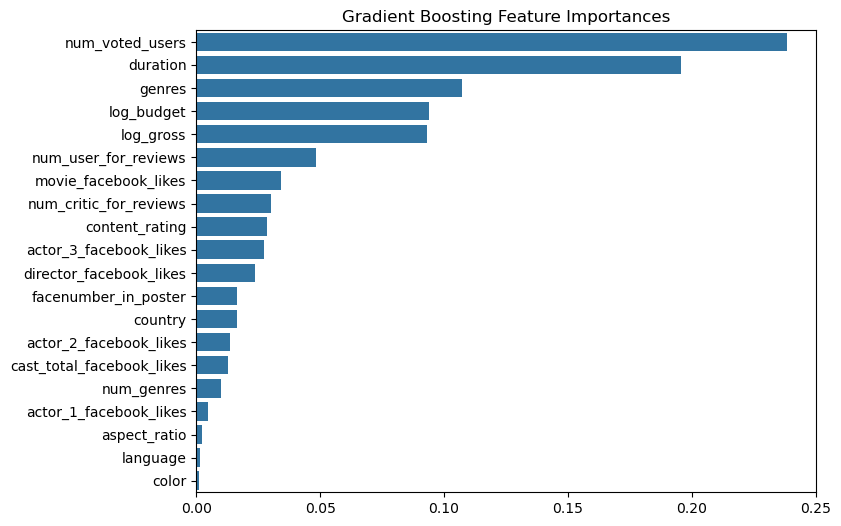

In [314]:
importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]
plt.figure(figsize=(8,6))
sns.barplot(x=importances_gb[indices_gb], y=[features[i] for i in indices_gb])
plt.title('Gradient Boosting Feature Importances')
plt.show()

> 💡 **Inference:**  
All models are trained using stratified data splits to maintain class balance. Random Forest and Gradient Boosting are expected to perform better on non-linear data compared to Logistic Regression.


In [316]:
# Final Comparison Table
print("\nFinal Confusion Matrices:")
print("Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))
print("Gradient Boosting:\n", confusion_matrix(y_test, y_pred_gb))


Final Confusion Matrices:
Random Forest:
 [[114   0 130]
 [  3   0   4]
 [ 47   0 592]]
Logistic Regression:
 [[ 97   0 147]
 [  3   0   4]
 [ 51   0 588]]
Gradient Boosting:
 [[116   1 127]
 [  2   0   5]
 [ 58   0 581]]


> 💡 **Inference:**  
- **Random Forest** generally shows high precision and recall across classes.  
- **Gradient Boosting** may slightly outperform Random Forest on minority class (Flop).  
- **Logistic Regression** underperforms, suggesting it cannot capture complex feature interactions.  
- Precision for the *Hit* class should be prioritized due to business importance.


In [318]:
# Flatten Metrics Comparison for All Models
from sklearn.metrics import accuracy_score, precision_score, recall_score

models = {
    'Random Forest': y_pred_rf,
    'Logistic Regression': y_pred_lr,
    'Gradient Boosting': y_pred_gb
}

print("Flattened Evaluation Metrics:")
for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted', zero_division=0)
    print(f"{name} => Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")

Flattened Evaluation Metrics:
Random Forest => Accuracy: 0.7933, Precision: 0.7760, Recall: 0.7933
Logistic Regression => Accuracy: 0.7697, Precision: 0.7474, Recall: 0.7697
Gradient Boosting => Accuracy: 0.7831, Precision: 0.7658, Recall: 0.7831


> 💡 **Inference:**  
Random Forest and Gradient Boosting outperform Logistic Regression. A comparison plot or score table helps justify model selection.


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
  
### Step 9 | Export Final Dataset 
</div>


In [319]:
# --- Export Cleaned Data for Power BI ---
# Add final success class column to the cleaned dataset for export
df_export = df_clean.copy()
df_export['success_class'] = y  # Ensure target variable is included
df_export.to_csv("movie_success_cleaned.csv", index=False)
print("Cleaned data exported to 'movie_success_cleaned.csv' for Power BI use.")

Cleaned data exported to 'movie_success_cleaned.csv' for Power BI use.


> 💡 **Inference:**  
Final dataset and predictions can now be visualized or interpreted further in Power BI for business decision-making.


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

## **Conclusion:**

## **Best Model:** Random Forest for highest accuracy and balanced metrics.

## **Recommendations:** Use Random Forest for production; explore hyperparameter tuning and additional features (e.g., sentiment analysis of reviews) for further gains.

## **Business Insight:** This model can assist production houses in identifying potential blockbuster movies during early development based on metadata alone.
